# Data Visualization

## Table & Statistics

First, we need some data to visualize. For this, we use the common example of the Titanic disaster, which is included in our [`safe-ds-examples` package](https://pypi.org/project/safe-ds-examples). Naturally, you can also use your own data.

In [1]:
from safeds_examples.tabular import load_titanic

titanic = load_titanic()

Now we have a look at the first 10 rows of the data:

In [2]:
titanic.slice(end=10)


,Name,Sex,Age,Number of Siblings or Spouses Aboard,Number of Parents or Children Aboard,Ticket Number,Travel Class,Fare,Cabin Number,Port of Embarkation,Survived
0,"Abbing, Mr. Anthony",male,42,0,0,C.A. 5547,3,7.55,?,Southampton,0
1,"Abbott, Master. Eugene Joseph",male,13,0,2,C.A. 2673,3,20.25,?,Southampton,0
2,"Abbott, Mr. Rossmore Edward",male,16,1,1,C.A. 2673,3,20.25,?,Southampton,0
3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35,1,1,C.A. 2673,3,20.25,?,Southampton,1
4,"Abelseth, Miss. Karen Marie",female,16,0,0,348125,3,7.65,?,Southampton,1
5,"Abelseth, Mr. Olaus Jorgensen",male,25,0,0,348122,3,7.65,F G63,Southampton,1
6,"Abelson, Mr. Samuel",male,30,1,0,P/PP 3381,2,24,?,Cherbourg,0
7,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,2,24,?,Cherbourg,1
8,"Abrahamsson, Mr. Abraham August Johannes",male,20,0,0,SOTON/O2 3101284,3,7.925,?,Southampton,1
9,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,3,7.2292,?,Cherbourg,1


Next some statistics:

In [3]:
titanic.summary()


,metrics,Name,Sex,Age,Number of Siblings or Spouses Aboard,Number of Parents or Children Aboard,Ticket Number,Travel Class,Fare,Cabin Number,Port of Embarkation,Survived
0,max,-,-,-,8,9,-,3,-,-,-,1
1,min,-,-,-,0,0,-,1,-,-,-,0
2,mean,-,-,-,0.4988540870893812,0.3850267379679144,-,2.294881588999236,-,-,-,0.3819709702062643
3,mode,"['Connolly, Miss. Kate', 'Kelly, Mr. James']",['male'],['?'],[0],[0],['CA. 2343'],[3],['8.05'],['?'],['Southampton'],[0]
4,median,-,-,-,0.0,0.0,-,3.0,-,-,-,0.0
5,sum,-,-,-,653,504,-,3004,-,-,-,500
6,variance,-,-,-,1.0850522026992615,0.7491945902631278,-,0.7019691946837118,-,-,-,0.2362496291260457
7,standard deviation,-,-,-,1.041658390596102,0.8655602753495147,-,0.8378360189701275,-,-,-,0.4860551708664827
8,idness,0.998472116119175,0.0015278838808250573,0.07563025210084033,0.0053475935828877,0.006111535523300229,0.7097020626432391,0.002291825821237586,0.21543162719633308,0.14285714285714285,0.0030557677616501145,0.0015278838808250573
9,stability,0.0015278838808250573,0.6440030557677616,0.20091673032849502,0.680672268907563,0.7654698242933538,0.008403361344537815,0.5416348357524828,0.04583651642475172,0.774637127578304,0.6982429335370511,0.6180290297937356


As you can see here, the **idness** of the column `Name` is almost 1. This means, that almost every row has a unique value for this column. Since this isn't helpful for our use-case we can drop it.

In [4]:
titanic_cleaned = titanic.drop_columns(["Name"])


## Heatmap

Now we have a rough idea of what we are looking at. But we still don't really know a lot about our dataset. So next, we can start to plot our columns against each other in a so-called Heatmap, to understand which values relate to each other.

But since this type of diagram only works for numerical values, we are going to use only those.

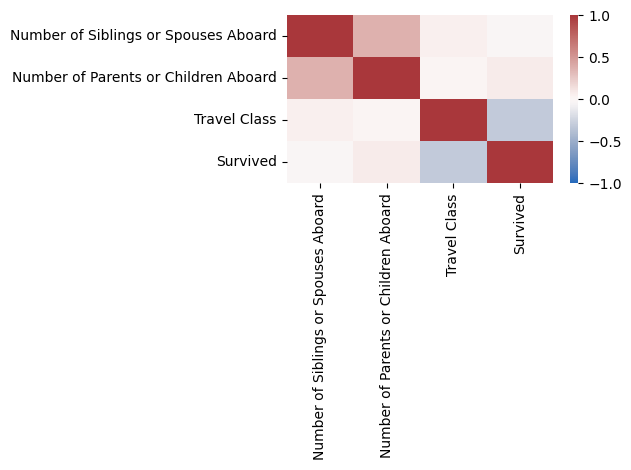

In [5]:
from safeds.data.tabular import Table
from safeds.plotting import correlation_heatmap

titanic_only_numerical = Table.from_columns(titanic_cleaned.list_columns_with_numerical_values())
correlation_heatmap(titanic_only_numerical)


As you can see, there seems to be some negative correlation between `Travel Class` and `Survived`, meaning that the higher the travel class, the lower the chance of survival. Let's have another look at that.

## Lineplot

We'll use a lineplot to better understand this relationship:

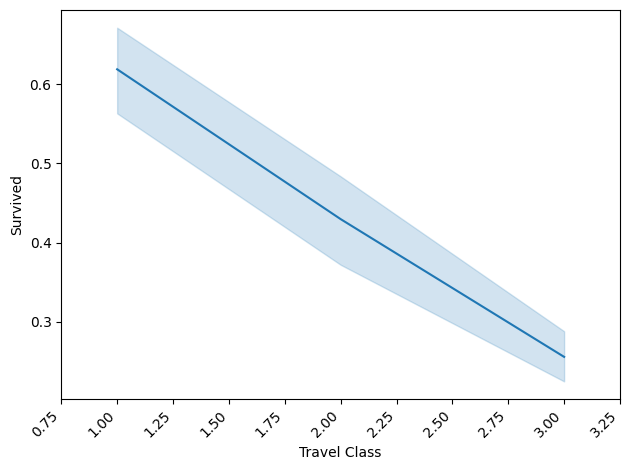

In [6]:
from safeds.plotting import lineplot

lineplot(titanic_only_numerical, "Travel Class", "Survived")


The line itself represents the central tendency and the hued area around it a confidence interval for that estimate.

We can indeed conclude that the higher the travel class, the lower the chance of survival.

## Other plots

Some other plots that might be useful are boxplots, histograms and scatterplots:

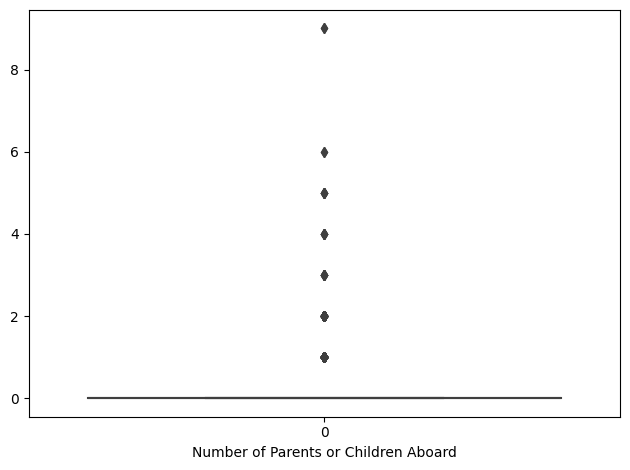

In [7]:
from safeds.plotting import boxplot

boxplot(titanic_cleaned.get_column("Number of Parents or Children Aboard"))


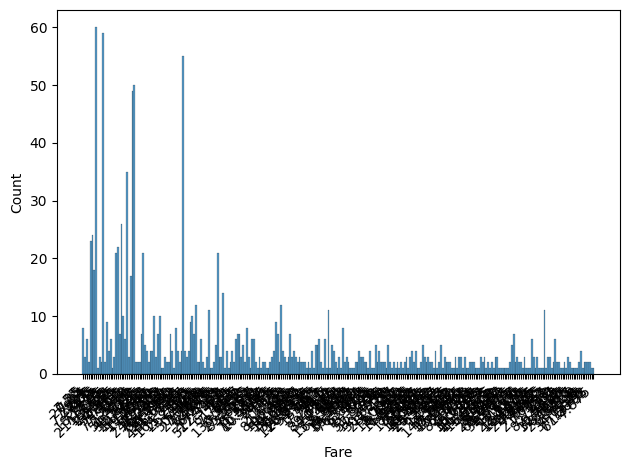

In [8]:
from safeds.plotting import histogram

histogram(titanic_cleaned.get_column("Fare"))


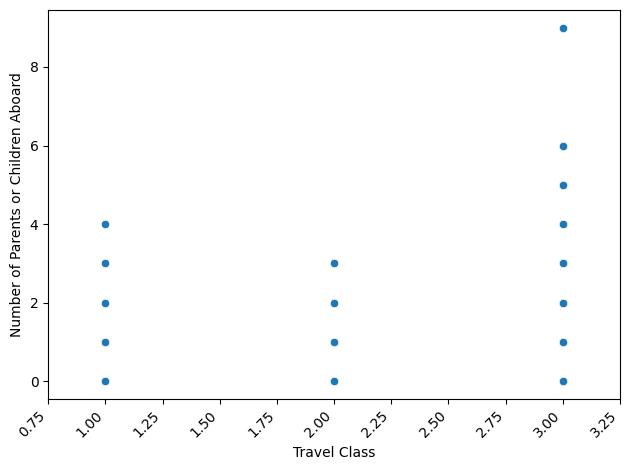

In [9]:
from safeds.plotting import scatterplot

scatterplot(titanic_cleaned, "Travel Class", "Number of Parents or Children Aboard")
